In [1]:
import keras
from keras.models import Sequential,Model
from keras.layers import Concatenate,Input,Convolution2D,MaxPooling2D
from keras.layers.core import Dense,Dropout,Activation,Flatten,Lambda

C:\Users\Xiangyun\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from trainModel import fit_with_KerasNN_continuous
import numpy as np
from pickle import load
from sklearn.model_selection import train_test_split
import json
from keras import backend as K
from ase.data import atomic_numbers



def build_data_set(fp_dict, per_atom_engs):
    X = []
    y = []
    for image_hash, image in fp_dict.items(): # 
        for i, atom in enumerate(image):
            atomic_number = int(atomic_numbers[atom[0]])
            atomic_fingerprint = atom[1]
            fp = np.append(atomic_number,
                           atomic_fingerprint)
            X.append(fp)
            y.append(per_atom_engs[image_hash][i])
    X = np.array(X)
    y = np.array(y)
    return X, y



In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
def parity_plot(y,y_predict):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111)
    ax.scatter(y,y_predict)
    plt.show()
    return

In [11]:
def build_model():
    inputs = Input(shape = (13,))
    x = Dense(32, activation = "relu")(inputs)
    x = Dense(32, activation = "relu")(x)
    prediction = Dense(1, activation = "linear")(x)
    
    model = Model(inputs = inputs, outputs = prediction)
    return model

In [5]:
fingerprints, energies, per_atom_energies, forces = load(open('3_water.pckl','rb'))
X, y = build_data_set(fingerprints, per_atom_energies)

In [9]:
len(X[0])

13

In [7]:
y

array([-0.48557823,  0.14340076,  0.14518562, ...,  0.1019386 ,
       -0.18737456, -0.0785441 ])

In [8]:
X_O = X[np.argwhere(X[:,0]==8).flatten()]
y_O = y[np.argwhere(X[:,0]==8).flatten()]
X_H = X[np.argwhere(X[:,0]==1).flatten()]
y_H = y[np.argwhere(X[:,0]==1).flatten()]

In [12]:
O_model = build_model()
O_model.compile(optimizer = "adam", loss = "mse", metrics = ["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
O_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [14]:
O_model.fit(X_O, y_O, nb_epoch=1000, shuffle=True)

Instructions for updating:
Use tf.cast instead.


C:\Users\Xiangyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/1000
3000/3000 [==============================] - 4s 1ms/step - loss: 5.0812 - acc: 0.0000e+00
Epoch 2/1000
3000/3000 [==============================] - 0s 94us/step - loss: 0.5642 - acc: 0.0000e+00
Epoch 3/1000
3000/3000 [==============================] - 0s 123us/step - loss: 0.3156 - acc: 0.0000e+00
Epoch 4/1000
3000/3000 [==============================] - 0s 135us/step - loss: 0.2078 - acc: 0.0000e+00
Epoch 5/1000
3000/3000 [==============================] - 0s 109us/step - loss: 0.1748 - acc: 0.0000e+00
Epoch 6/1000
3000/3000 [==============================] - 0s 112us/step - loss: 0.1287 - acc: 0.0000e+00
Epoch 7/1000
3000/3000 [==============================] - 0s 111us/step - loss: 0.1236 - acc: 0.0000e+00
Epoch 8/1000
3000/3000 [==============================] - 0s 117us/step - loss: 0.1200 - acc: 0.0000e+00
Epoch 9/1000
3000/3000 [==============================] - 0s 111us/step - loss: 0.1040 - acc: 0.0000e+00
Epoch 10/1000
3000/3000 [==============================] -

Epoch 79/1000
3000/3000 [==============================] - 0s 102us/step - loss: 0.0364 - acc: 0.0000e+00
Epoch 80/1000
3000/3000 [==============================] - 0s 101us/step - loss: 0.0345 - acc: 0.0000e+00
Epoch 81/1000
3000/3000 [==============================] - 0s 99us/step - loss: 0.0280 - acc: 0.0000e+00
Epoch 82/1000
3000/3000 [==============================] - 0s 99us/step - loss: 0.0703 - acc: 0.0000e+00
Epoch 83/1000
3000/3000 [==============================] - 0s 94us/step - loss: 0.0374 - acc: 0.0000e+00
Epoch 84/1000
3000/3000 [==============================] - 0s 95us/step - loss: 0.0319 - acc: 0.0000e+00
Epoch 85/1000
3000/3000 [==============================] - 0s 95us/step - loss: 0.0451 - acc: 0.0000e+00
Epoch 86/1000
3000/3000 [==============================] - 0s 94us/step - loss: 0.0494 - acc: 0.0000e+00
Epoch 87/1000
3000/3000 [==============================] - 0s 96us/step - loss: 0.0340 - acc: 0.0000e+00
Epoch 88/1000
3000/3000 [============================

3000/3000 [==============================] - 0s 95us/step - loss: 0.0200 - acc: 0.0000e+00
Epoch 234/1000
3000/3000 [==============================] - 0s 93us/step - loss: 0.0164 - acc: 0.0000e+00
Epoch 235/1000
3000/3000 [==============================] - 0s 96us/step - loss: 0.0147 - acc: 0.0000e+00
Epoch 236/1000
3000/3000 [==============================] - 0s 95us/step - loss: 0.0145 - acc: 0.0000e+00
Epoch 237/1000
3000/3000 [==============================] - 0s 96us/step - loss: 0.0171 - acc: 0.0000e+00
Epoch 238/1000
3000/3000 [==============================] - 0s 94us/step - loss: 0.0202 - acc: 0.0000e+00
Epoch 239/1000
3000/3000 [==============================] - 0s 95us/step - loss: 0.0210 - acc: 0.0000e+00
Epoch 240/1000
3000/3000 [==============================] - 0s 95us/step - loss: 0.0130 - acc: 0.0000e+00
Epoch 241/1000
3000/3000 [==============================] - 0s 94us/step - loss: 0.0192 - acc: 0.0000e+00
Epoch 242/1000
3000/3000 [==============================] - 0

3000/3000 [==============================] - 0s 96us/step - loss: 0.0146 - acc: 0.0000e+00
Epoch 388/1000
3000/3000 [==============================] - 0s 96us/step - loss: 0.0094 - acc: 0.0000e+00
Epoch 389/1000
3000/3000 [==============================] - 0s 94us/step - loss: 0.0094 - acc: 0.0000e+00
Epoch 390/1000
3000/3000 [==============================] - 0s 95us/step - loss: 0.0092 - acc: 0.0000e+00
Epoch 391/1000
3000/3000 [==============================] - 0s 95us/step - loss: 0.0097 - acc: 0.0000e+00
Epoch 392/1000
3000/3000 [==============================] - 0s 94us/step - loss: 0.0098 - acc: 0.0000e+00
Epoch 393/1000
3000/3000 [==============================] - 0s 94us/step - loss: 0.0105 - acc: 0.0000e+00
Epoch 394/1000
3000/3000 [==============================] - 0s 95us/step - loss: 0.0100 - acc: 0.0000e+00
Epoch 395/1000
3000/3000 [==============================] - 0s 94us/step - loss: 0.0097 - acc: 0.0000e+00
Epoch 396/1000
3000/3000 [==============================] - 0

3000/3000 [==============================] - 0s 96us/step - loss: 0.0084 - acc: 0.0000e+00
Epoch 542/1000
3000/3000 [==============================] - 0s 96us/step - loss: 0.0084 - acc: 0.0000e+00
Epoch 543/1000
3000/3000 [==============================] - 0s 94us/step - loss: 0.0085 - acc: 0.0000e+00
Epoch 544/1000
3000/3000 [==============================] - 0s 96us/step - loss: 0.0084 - acc: 0.0000e+00
Epoch 545/1000
3000/3000 [==============================] - 0s 96us/step - loss: 0.0089 - acc: 0.0000e+00
Epoch 546/1000
3000/3000 [==============================] - 0s 95us/step - loss: 0.0088 - acc: 0.0000e+00
Epoch 547/1000
3000/3000 [==============================] - 0s 95us/step - loss: 0.0080 - acc: 0.0000e+00
Epoch 548/1000
3000/3000 [==============================] - 0s 95us/step - loss: 0.0080 - acc: 0.0000e+00
Epoch 549/1000
3000/3000 [==============================] - 0s 94us/step - loss: 0.0080 - acc: 0.0000e+00
Epoch 550/1000
3000/3000 [==============================] - 0

3000/3000 [==============================] - 0s 95us/step - loss: 0.0074 - acc: 0.0000e+00
Epoch 696/1000
3000/3000 [==============================] - 0s 93us/step - loss: 0.0075 - acc: 0.0000e+00
Epoch 697/1000
3000/3000 [==============================] - 0s 96us/step - loss: 0.0073 - acc: 0.0000e+00
Epoch 698/1000
3000/3000 [==============================] - 0s 93us/step - loss: 0.0073 - acc: 0.0000e+00
Epoch 699/1000
3000/3000 [==============================] - 0s 97us/step - loss: 0.0074 - acc: 0.0000e+00
Epoch 700/1000
3000/3000 [==============================] - 0s 100us/step - loss: 0.0074 - acc: 0.0000e+00
Epoch 701/1000
3000/3000 [==============================] - 0s 97us/step - loss: 0.0074 - acc: 0.0000e+00
Epoch 702/1000
3000/3000 [==============================] - 0s 95us/step - loss: 0.0073 - acc: 0.0000e+00
Epoch 703/1000
3000/3000 [==============================] - 0s 95us/step - loss: 0.0074 - acc: 0.0000e+00
Epoch 704/1000
3000/3000 [==============================] - 

3000/3000 [==============================] - 0s 96us/step - loss: 0.0067 - acc: 0.0000e+00
Epoch 850/1000
3000/3000 [==============================] - 0s 94us/step - loss: 0.0069 - acc: 0.0000e+00
Epoch 851/1000
3000/3000 [==============================] - 0s 95us/step - loss: 0.0067 - acc: 0.0000e+00
Epoch 852/1000
3000/3000 [==============================] - 0s 95us/step - loss: 0.0070 - acc: 0.0000e+00
Epoch 853/1000
3000/3000 [==============================] - 0s 96us/step - loss: 0.0071 - acc: 0.0000e+00
Epoch 854/1000
3000/3000 [==============================] - 0s 96us/step - loss: 0.0073 - acc: 0.0000e+00
Epoch 855/1000
3000/3000 [==============================] - 0s 96us/step - loss: 0.0068 - acc: 0.0000e+00
Epoch 856/1000
3000/3000 [==============================] - 0s 97us/step - loss: 0.0069 - acc: 0.0000e+00
Epoch 857/1000
3000/3000 [==============================] - 0s 94us/step - loss: 0.0073 - acc: 0.0000e+00
Epoch 858/1000
3000/3000 [==============================] - 0

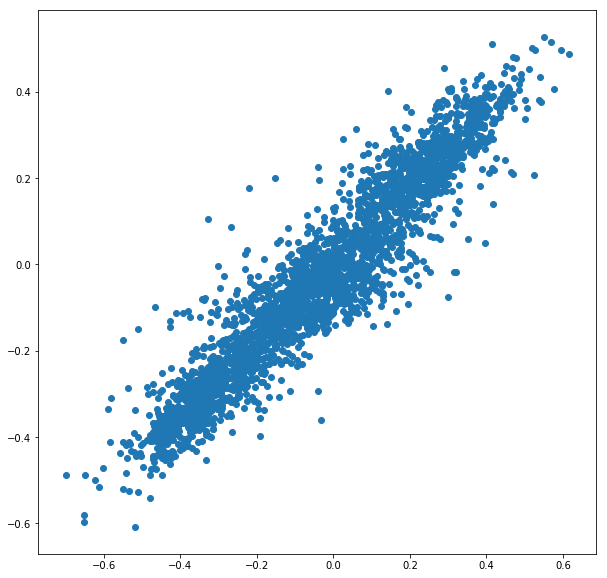

In [15]:
y_O_predict = O_model.predict(X_O)
parity_plot(y_O,y_O_predict)

In [16]:
H_model = build_model()
H_model.compile(optimizer = "adam", loss = "mse", metrics = ["accuracy"])
H_model.fit(X_H, y_H, nb_epoch=1000, shuffle=True)

C:\Users\Xiangyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/1000
6000/6000 [==============================] - 1s 132us/step - loss: 102.2609 - acc: 0.0000e+00
Epoch 2/1000
6000/6000 [==============================] - 1s 97us/step - loss: 2.4661 - acc: 0.0000e+00
Epoch 3/1000
6000/6000 [==============================] - 1s 97us/step - loss: 1.1587 - acc: 0.0000e+00
Epoch 4/1000
6000/6000 [==============================] - 1s 105us/step - loss: 0.6716 - acc: 0.0000e+00
Epoch 5/1000
6000/6000 [==============================] - 1s 106us/step - loss: 0.4439 - acc: 0.0000e+00
Epoch 6/1000
6000/6000 [==============================] - 1s 101us/step - loss: 0.2967 - acc: 0.0000e+00
Epoch 7/1000
6000/6000 [==============================] - 1s 96us/step - loss: 0.1979 - acc: 0.0000e+00
Epoch 8/1000
6000/6000 [==============================] - 1s 96us/step - loss: 0.1495 - acc: 0.0000e+00
Epoch 9/1000
6000/6000 [==============================] - 1s 96us/step - loss: 0.1281 - acc: 0.0000e+00
Epoch 10/1000
6000/6000 [==============================] -

6000/6000 [==============================] - 1s 96us/step - loss: 0.0128 - acc: 0.0000e+00
Epoch 156/1000
6000/6000 [==============================] - 1s 96us/step - loss: 0.0139 - acc: 0.0000e+00
Epoch 157/1000
6000/6000 [==============================] - 1s 96us/step - loss: 0.0119 - acc: 0.0000e+00
Epoch 158/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0116 - acc: 0.0000e+00
Epoch 159/1000
6000/6000 [==============================] - 1s 96us/step - loss: 0.0114 - acc: 0.0000e+00
Epoch 160/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0114 - acc: 0.0000e+00
Epoch 161/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0134 - acc: 0.0000e+00
Epoch 162/1000
6000/6000 [==============================] - 1s 94us/step - loss: 0.0119 - acc: 0.0000e+00
Epoch 163/1000
6000/6000 [==============================] - 1s 94us/step - loss: 0.0098 - acc: 0.0000e+00
Epoch 164/1000
6000/6000 [==============================] - 1

6000/6000 [==============================] - 1s 95us/step - loss: 0.0069 - acc: 0.0000e+00
Epoch 310/1000
6000/6000 [==============================] - 1s 96us/step - loss: 0.0067 - acc: 0.0000e+00
Epoch 311/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0069 - acc: 0.0000e+00
Epoch 312/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0067 - acc: 0.0000e+00
Epoch 313/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0068 - acc: 0.0000e+00
Epoch 314/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0068 - acc: 0.0000e+00
Epoch 315/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0071 - acc: 0.0000e+00
Epoch 316/1000
6000/6000 [==============================] - 1s 94us/step - loss: 0.0069 - acc: 0.0000e+00
Epoch 317/1000
6000/6000 [==============================] - 1s 94us/step - loss: 0.0068 - acc: 0.0000e+00
Epoch 318/1000
6000/6000 [==============================] - 1

6000/6000 [==============================] - 1s 96us/step - loss: 0.0065 - acc: 0.0000e+00
Epoch 464/1000
6000/6000 [==============================] - 1s 96us/step - loss: 0.0065 - acc: 0.0000e+00
Epoch 465/1000
6000/6000 [==============================] - 1s 113us/step - loss: 0.0065 - acc: 0.0000e+00
Epoch 466/1000
6000/6000 [==============================] - 1s 131us/step - loss: 0.0064 - acc: 0.0000e+00
Epoch 467/1000
6000/6000 [==============================] - 1s 121us/step - loss: 0.0064 - acc: 0.0000e+00
Epoch 468/1000
6000/6000 [==============================] - 1s 140us/step - loss: 0.0064 - acc: 0.0000e+00
Epoch 469/1000
6000/6000 [==============================] - 1s 153us/step - loss: 0.0065 - acc: 0.0000e+00
Epoch 470/1000
6000/6000 [==============================] - 1s 113us/step - loss: 0.0065 - acc: 0.0000e+00
Epoch 471/1000
6000/6000 [==============================] - 1s 132us/step - loss: 0.0065 - acc: 0.0000e+00
Epoch 472/1000
6000/6000 [============================

6000/6000 [==============================] - 1s 95us/step - loss: 0.0064 - acc: 0.0000e+00
Epoch 618/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0064 - acc: 0.0000e+00
Epoch 619/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0063 - acc: 0.0000e+00
Epoch 620/1000
6000/6000 [==============================] - 1s 96us/step - loss: 0.0063 - acc: 0.0000e+00
Epoch 621/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0063 - acc: 0.0000e+00
Epoch 622/1000
6000/6000 [==============================] - 1s 98us/step - loss: 0.0063 - acc: 0.0000e+00
Epoch 623/1000
6000/6000 [==============================] - 1s 96us/step - loss: 0.0064 - acc: 0.0000e+00
Epoch 624/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0064 - acc: 0.0000e+00
Epoch 625/1000
6000/6000 [==============================] - 1s 97us/step - loss: 0.0063 - acc: 0.0000e+00
Epoch 626/1000
6000/6000 [==============================] - 1

6000/6000 [==============================] - 1s 94us/step - loss: 0.0063 - acc: 0.0000e+00
Epoch 772/1000
6000/6000 [==============================] - 1s 97us/step - loss: 0.0063 - acc: 0.0000e+00
Epoch 773/1000
6000/6000 [==============================] - 1s 96us/step - loss: 0.0063 - acc: 0.0000e+00
Epoch 774/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0062 - acc: 0.0000e+00
Epoch 775/1000
6000/6000 [==============================] - 1s 94us/step - loss: 0.0062 - acc: 0.0000e+00
Epoch 776/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0063 - acc: 0.0000e+00
Epoch 777/1000
6000/6000 [==============================] - 1s 96us/step - loss: 0.0062 - acc: 0.0000e+00
Epoch 778/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0063 - acc: 0.0000e+00
Epoch 779/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0062 - acc: 0.0000e+00
Epoch 780/1000
6000/6000 [==============================] - 1

6000/6000 [==============================] - 1s 104us/step - loss: 0.0063 - acc: 0.0000e+00
Epoch 926/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0062 - acc: 0.0000e+00
Epoch 927/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0062 - acc: 0.0000e+00
Epoch 928/1000
6000/6000 [==============================] - 1s 94us/step - loss: 0.0062 - acc: 0.0000e+00
Epoch 929/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0063 - acc: 0.0000e+00
Epoch 930/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0062 - acc: 0.0000e+00
Epoch 931/1000
6000/6000 [==============================] - 1s 95us/step - loss: 0.0063 - acc: 0.0000e+00
Epoch 932/1000
6000/6000 [==============================] - 1s 96us/step - loss: 0.0063 - acc: 0.0000e+00
Epoch 933/1000
6000/6000 [==============================] - 1s 96us/step - loss: 0.0063 - acc: 0.0000e+00
Epoch 934/1000
6000/6000 [==============================] - 

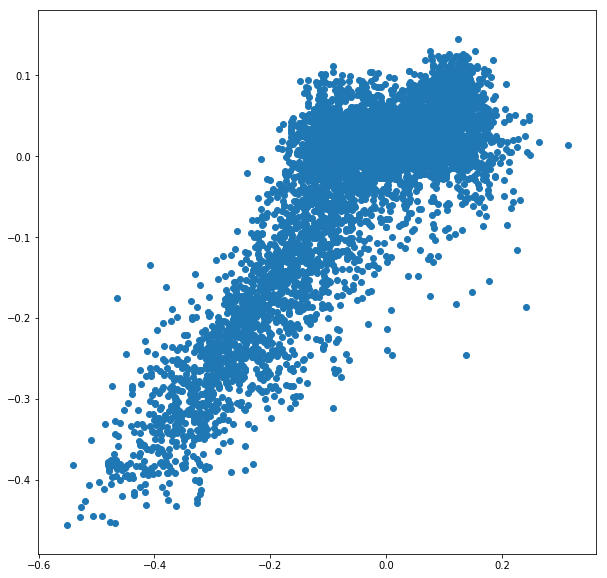

In [17]:
y_H_predict = H_model.predict(X_H)
parity_plot(y_H,y_H_predict)

In [ ]:
H_model.save("H_model_pretrained.h5")
O_model.save("O_model_pretrained.h5")

In [ ]:
def build_per_image_data_set(fp_dict, energies, per_atom_engs):
    X = []
    y = []
    n=0
    y_per_atom = []
    for image_hash, image in fp_dict.items():
        image_fps = []
        image_per_atom_energies = []
        n+=1
        #print(n)
        for i, atom in enumerate(image):
            atomic_number = int(atomic_numbers[atom[0]])
            atomic_fingerprint = atom[1]
            fp = np.append(atomic_number,
                           atomic_fingerprint)
            image_fps.append(fp.copy())
            image_per_atom_energies.append(per_atom_engs[image_hash][i])
        #print(len(X))
        image_fps = np.array(image_fps)
        X.append(image_fps)
        y.append(energies[image_hash])
        y_per_atom.append(image_per_atom_energies.copy())
    X = np.array(X)
    y = np.array(y)
    y_per_atom = np.array(y_per_atom)
    return X, y, y_per_atom
X_image, y_image, y_per_atom = build_per_image_data_set(fingerprints, energies, per_atom_energies)

In [ ]:
X_image[0]
X_image_O = []
X_image_H = []
for i in range(len(X_image)):
    temp_O = []
    temp_H = []
    for j in range(len(X_image[i])):
        if X_image[i][j][0] == 1.0:
            temp_H.append(X_image[i][j])
        if X_image[i][j][0] == 8.0:
            temp_O.append(X_image[i][j])
    X_image_H.append(temp_H)
    X_image_O.append(temp_O)
X_image_H = np.array(X_image_H)
X_image_O = np.array(X_image_O)

In [ ]:
from keras.models import load_model
O_model2 = load_model("O_model.h5")
H_model2 = load_model("H_model.h5")

In [ ]:
def output_of_lambda(input_shape):
    print(input_shape)
    return (1,input_shape[0])

def mean(x):
    return K.mean(x, axis=1, keepdims=True)


input_O = Input(shape = (3,21))
input_H = Input(shape = (6,21))
branch_outputs = []
for i in range(3):
    x = Lambda(lambda x : x[:,i,:])(input_O)
    print(x.shape)
    atom_energy = O_model2(x)
    branch_outputs.append(atom_energy)
    
for i in range(6):
    x = Lambda(lambda x : x[:,i,:])(input_H)
    print(x.shape)
    atom_energy = H_model2(x)
    branch_outputs.append(atom_energy)
    
#pooled_energy = Concatenate()(branch_outputs)
#print(pooled_energy.shape)
#energy_sum = Lambda(lambda x: K.sum(x,axis = -1))(pooled_energy)
#energy_sum = Lambda(lambda x: K.sum(x, axis=-1), output_shape=lambda s: (s[0], 1))(pooled_energy)

#print(energy_sum.shape)
energy_sum = keras.layers.Add()(branch_outputs)

In [ ]:
model = Model(inputs=[input_O, input_H], outputs=energy_sum)
model.compile(optimizer = "adam", loss = "mae")
model.summary()

In [ ]:
y_image_predict = model.predict([X_image_O, X_image_H])
print(y_image_predict.shape)
parity_plot(y_image,y_image_predict)

In [ ]:
model.fit([X_image_O, X_image_H], [y_image], nb_epoch=100,shuffle=True)

In [ ]:
y_image_predict = model.predict([X_image_O, X_image_H])
print(y_image_predict.shape)
parity_plot(y_image,y_image_predict)

In [ ]:
y_H_predict = H_model2.predict(X_H)
parity_plot(y_H,y_H_predict)

In [ ]:
y_O_predict = O_model2.predict(X_O)
parity_plot(y_O,y_O_predict)

In [ ]:
H_model2.save("H_model2.h5")
O_model2.save("O_model2.h5")

In [ ]:
O_model3 = load_model("O_model2.h5")
H_model3 = load_model("H_model2.h5")

In [ ]:
y_H_predict = H_model3.predict(X_H)
parity_plot(y_H,y_H_predict)
y_O_predict = O_model3.predict(X_O)
parity_plot(y_O,y_O_predict)